In [1]:
import os
import pandas as pd
import json

# Pad naar de map met JSON-bestanden
directory = "batches_2025-03-26_13-04-42"

# Lijst voor alle observaties
all_observations = []

# Doorloop alle JSON-bestanden in de map
for filename in os.listdir(directory):
    if filename.endswith(".json"):
        file_path = os.path.join(directory, filename)
        
        # JSON-bestand inlezen
        with open(file_path, "r", encoding="utf-8") as f:
            data = json.load(f)
        
        # Voeg observaties toe aan de lijst
        for obs in data:
            observation = {
                "id": obs["id"],
                # "date": obs["date"],
                "species_name": obs["species_detail"]["name"],
                "species_scientific_name": obs["species_detail"]["scientific_name"],
                # "Accuracy": obs["accuracy"],
                "life_stage": obs["life_stage"],
                "rarity": obs["rarity"],
                "Species_status": obs["species_status"],
                # "species": obs["species"],
                # "number": obs["number"],
                "sex": obs["sex"],
                "location_name": obs["location_detail"]["name"],
                "location_country_code": obs["location_detail"]["country_code"],
                "coordinates": obs["point"]["coordinates"] if obs["point"] else None,  # Coördinaten
                "validation_status": obs["validation_status"],
                # "observer_name": obs["user_detail"]["name"],
                "permalink": obs["location_detail"]["permalink"]
            }
            all_observations.append(observation)

# Zet alle observaties om in een DataFrame
df = pd.DataFrame(all_observations)

# DataFrame weergeven
print(df.shape)
df.head()

# Opslaan als CSV (optioneel)
# df.to_csv("observations.csv", index=False, encoding="utf-8")


(127538, 12)


,id,species_name,species_scientific_name,life_stage,rarity,Species_status,sex,location_name,location_country_code,coordinates,validation_status,permalink
0,339205350,Black-crowned Night Heron,Nycticorax nycticorax,2,3,4,U,Rotterdam - Diergaarde Blijdorp,NL,"[4.454081958477559, 51.92602277773836]",O,https://waarneming.nl/locations/9192/
1,339187280,Black-crowned Night Heron,Nycticorax nycticorax,1,3,4,U,Rotterdam - Blijdorp (wijk),NL,"[4.44821834564209, 51.9301923400646]",O,https://waarneming.nl/locations/44395/
2,334583888,Black-crowned Night Heron,Nycticorax nycticorax,1,3,4,U,Rotterdam - Diergaarde Blijdorp,NL,"[4.447233136747449, 51.928574284586986]",O,https://waarneming.nl/locations/9192/
3,335153861,Black-crowned Night Heron,Nycticorax nycticorax,1,3,4,U,Rotterdam - Spoorlijn nabij dierentuin Blijdorp,NL,"[4.448437616229057, 51.928477619536416]",O,https://waarneming.nl/locations/15904/
4,310314161,Black-crowned Night Heron,Nycticorax nycticorax,1,3,4,U,Rotterdam - Diergaarde Blijdorp,NL,"[4.4526854, 51.927304]",P,https://waarneming.nl/locations/9192/


<Axes: >

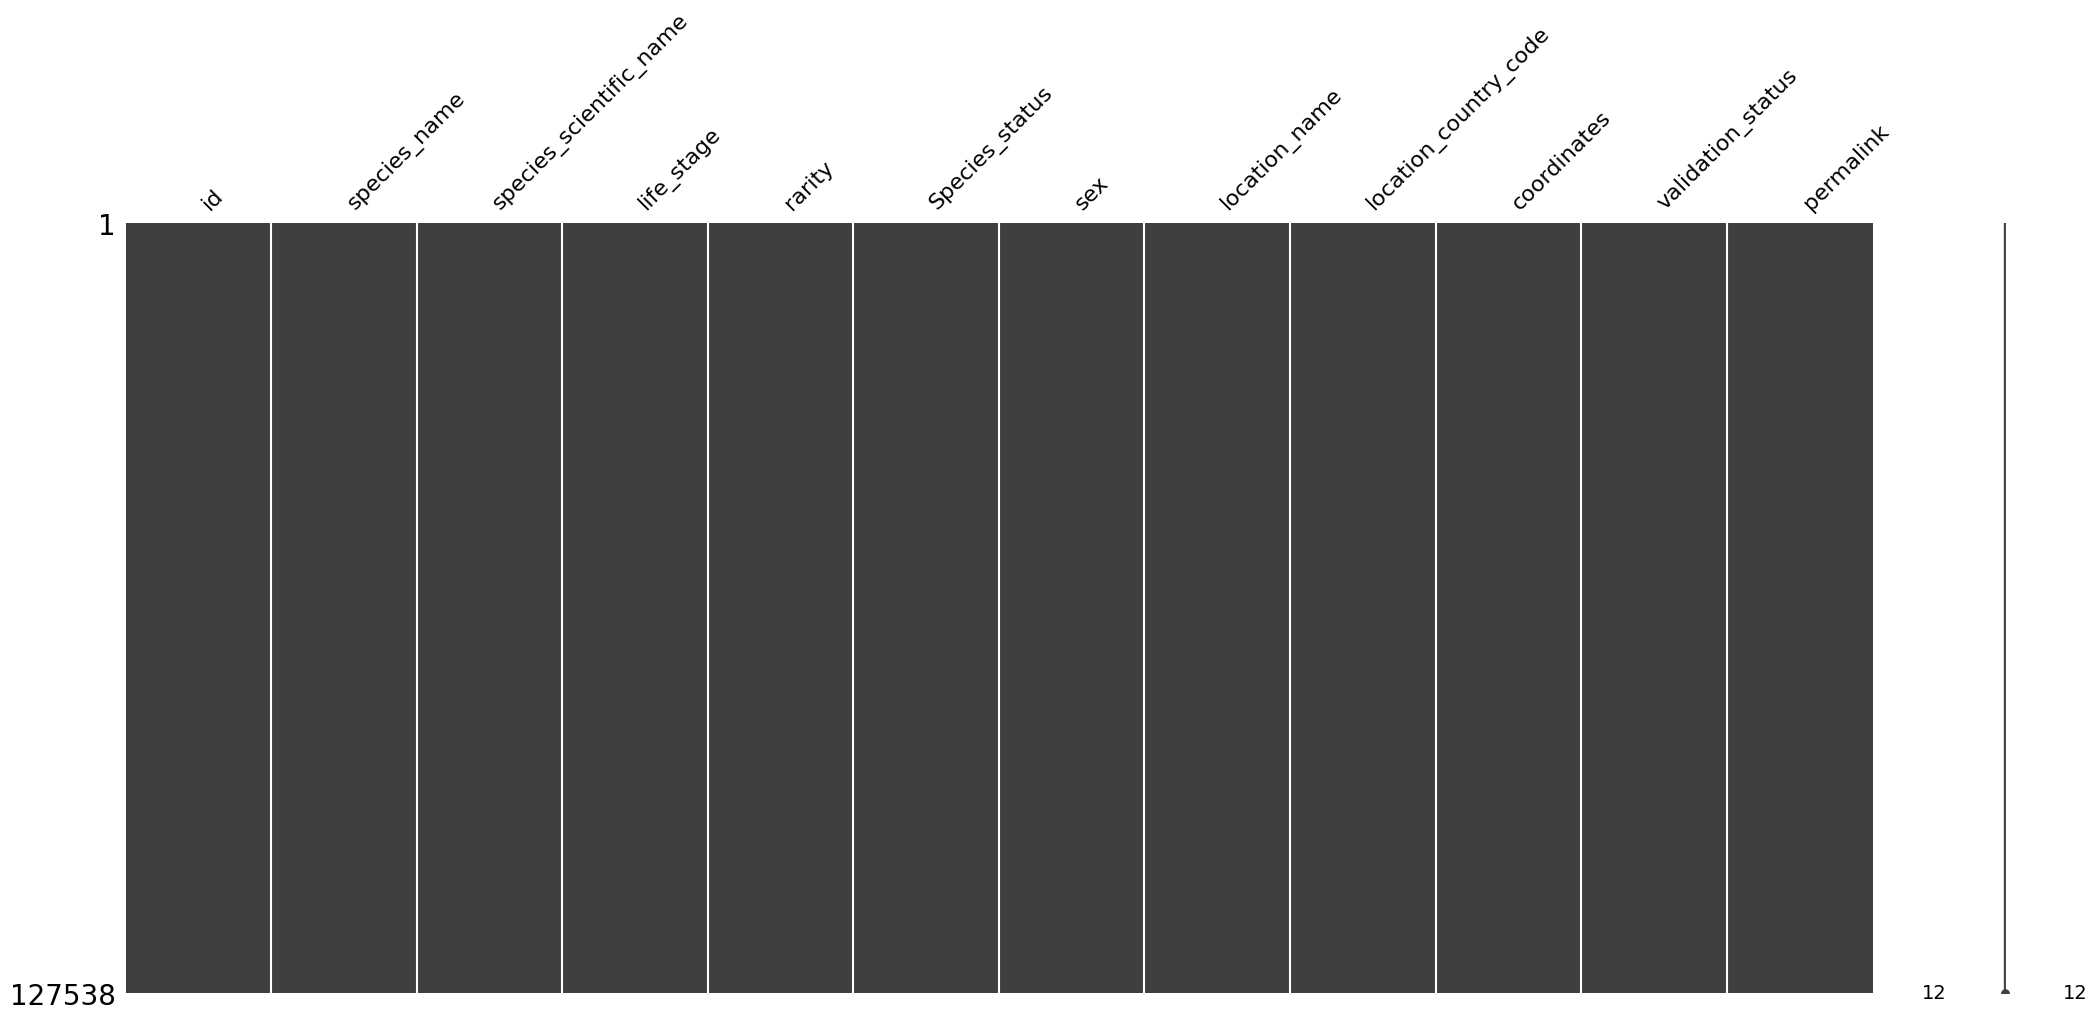

In [2]:
import missingno as mnso

mnso.matrix(df)

___

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127538 entries, 0 to 127537
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   id                       127538 non-null  int64 
 1   species_name             127538 non-null  object
 2   species_scientific_name  127538 non-null  object
 3   life_stage               127538 non-null  int64 
 4   rarity                   127538 non-null  int64 
 5   Species_status           127538 non-null  int64 
 6   sex                      127538 non-null  object
 7   location_name            127538 non-null  object
 8   location_country_code    127538 non-null  object
 9   coordinates              127538 non-null  object
 10  validation_status        127538 non-null  object
 11  permalink                127538 non-null  object
dtypes: int64(4), object(8)
memory usage: 11.7+ MB


In [4]:
species_list = df['species_name'].unique().tolist()

for species in species_list:
    print(species)

Black-crowned Night Heron
Purple Heron
Eurasian Bittern
Red-crested Pochard
Black-necked Grebe
White Stork
Little Grebe
Eurasian Spoonbill
Marsh Tit
Common Redstart
European Golden Plover
Western Yellow Wagtail
Goldcrest
Eurasian Jay
Common Swift
Great Crested Grebe
Pearly Underwing
White-line Dart
White Satin Moth
Sulphur Pearl
Northern Raccoon

Hybrid Waterlilies
Sulphur Tubic
Tree Damsel Bug
Fly unknown/Mosquito unknown/Midge unknown
Golden Chervil
Annual Pearlwort
Slender Pearlwort
Round Goby
Red Swamp Crayfish
Rose Campion
Saltmarsh Rush
Codling moth
Compass jellyfish
Plant unknown
Spotted Flycatcher
Common Greenshank
Eurasian Bullfinch
Canada Goose
Common Whitethroat
Meadow Pipit
Great Spotted Woodpecker
Greylag Goose
Great Black-backed Gull
Rose-ringed Parakeet
Great Egret
Mistle Thrush
Stock Dove
Common Merganser
Dunnock
Eurasian Goshawk
Common Wood Pigeon
Central European Treecreeper
Western Jackdaw ssp soemmerringii
Atlantic Canary
Bar-headed Goose
Red Knot
Eurasian Woodcock


API_KEY = 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

In [5]:
# import pandas as pd
# import threading
# import time
# import logging
# from groq import Groq
# from requests.exceptions import Timeout, RequestException
# from concurrent.futures import ThreadPoolExecutor, as_completed

# # Stel de logging in
# logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s', handlers=[
#     logging.StreamHandler(),  # print naar console
#     logging.FileHandler('api_calls_log.txt', mode='w')  # log naar bestand
# ])

# # Creëer een client voor de Groq API
# client = Groq(api_key='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')

# # Functie om de API-aanroep te doen voor elk item
# def filter_item(item_name):
#     try:
#         logging.info(f"Start API-aanroep voor item: {item_name}")
#         completion = client.chat.completions.create(
#             model="deepseek-r1-distill-qwen-70b",
#             messages=[{
#                 "role": "system",
#                 "content": f"Je bent een AI-assistent die helpt bij het filteren van mijn dataset. De dataset bevat namen van verschillende objecten, en jij moet bepalen of een item behoort tot een van de volgende drie categorieën: planten, bomen of bloemen.\n\nAls het item een plant, boom of bloem is, moet je het behouden en aangeven tot welke categorie het behoort.\n\nAls het item niet in een van deze categorieën valt, moet je het verwijderen en aangeven waarom (bijvoorbeeld: dier, object, voedsel, etc.).\n\n Few-shot learning voorbeelden:\n1. Invoer: Eik\nUitvoer: Behouden (Boom)\n\n2. Invoer: Roos\nUitvoer: Behouden (Bloem)\n\n3. Invoer: Tulp\nUitvoer: Behouden (Bloem)\n\n4. Invoer: Hond\nUitvoer: Verwijderen (Dier)\n\n5. Invoer: Auto\nUitvoer: Verwijderen (Object)\n\n6. Invoer: Basilicum\nUitvoer: Behouden (Plant)\n\n7. Invoer: Laptop\nUitvoer: Verwijderen (Object)\n\nInvoer: {item_name}"
#             }],
#             temperature=0.6,
#             max_completion_tokens=4096,
#             top_p=0.95,
#             stream=True,
#             stop=None,
#         )

#         # Verkrijg het resultaat en geef de inhoud terug
#         result = ""
#         for chunk in completion:
#             content = chunk.choices[0].delta.content.strip()
#             result += content
#             logging.debug(f"Ontvangen chunk voor item {item_name}: {content}")

#         logging.info(f"API-aanroep succesvol voor item: {item_name}, resultaat: {result}")
#         return result

#     except Timeout:
#         logging.error(f"Timeout bereikt voor item: {item_name}")
#         return "Fout: Time-out bij het ophalen van gegevens."
    
#     except RequestException as e:
#         if "429" in str(e):
#             logging.error(f"Te veel aanvragen voor item: {item_name}, wachten voordat we het opnieuw proberen.")
#             time.sleep(10)  # Wacht 10 seconden bij fout 429
#             return filter_item(item_name)  # Probeer opnieuw

#     except Exception as e:
#         logging.error(f"Fout bij het verwerken van item {item_name}: {e}")
#         return "Fout bij het verwerken van het item."

# # Functie om threading en time.sleep toe te passen
# def process_with_threading(df):
#     results = []
    
#     # Haal de unieke waarden uit de DataFrame
#     unique_items = df['species_name'].unique()

#     # Functie om de API-aanroepen per item in een thread te doen
#     def process_item(item_name):
#         return filter_item(item_name)

#     with ThreadPoolExecutor(max_workers=3) as executor:  # Max aantal gelijktijdige verzoeken
#         future_to_item = {executor.submit(process_item, item): item for item in unique_items}
        
#         # Verwerk resultaten wanneer ze beschikbaar zijn
#         for future in as_completed(future_to_item):
#             item_name = future_to_item[future]
#             try:
#                 result = future.result()
#                 results.append(result)
#             except Exception as exc:
#                 logging.error(f'Fout bij verwerken van item {item_name}: {exc}')
#                 results.append("Fout bij het verwerken van het item.")
            
#             # Wacht 1 seconde na elke aanvraag (kan worden aangepast)
#             time.sleep(1)

#     return results


In [6]:
# # Verwerk de items met threading en time-out handling
# df_res = pd.DataFrame(columns=['resultaat'])

# # Stap 3: Pas de functie toe op de kolom met threading
# df_res['resultaat'] = process_with_threading(df)

# # Toon het resultaat
# print(df_res)


In [7]:
plant_species = [
    "Hybrid Waterlilies",
    "Golden Chervil",
    "Annual Pearlwort",
    "Slender Pearlwort",
    "Rose Campion",
    "Saltmarsh Rush",
    "Plant unknown",
    "Fragrant Agrimony",
    "Corncockle",
    "Agrimony",
    "Marsh-mallow",
    "Wild Celery",
    "Kidney Vetch",
    "Absinthium",
    "Thrift",
    "Hard-fern",
    "Rampion Bellflower",
    "Carline Thistle",
    "Pendulous Sedge",
    "Sea Fern-grass",
    "Fern-grass",
    "Greater Knapweed",
    "Cornflower",
    "Great Fen-sedge",
    "Wild Basil",
    "Cornelian-cherry",
    "Crosswort",
    "Brittle Bladder Fern",
    "Crested Dog's-tail",
    "Deptford Pink",
    "Maiden Pink",
    "Carthusian Pink",
    "Sticky Stork's-bill",
    "Wallflower",
    "Marsh Spurge",
    "Rigid Eyebright s.l.",
    "Sea Spurge",
    "Common Cudweed",
    "Wild Strawberry",
    "Dyer's Greenweed",
    "Annual Gypsophila",
    "Smooth Cat's-ear",
    "Juniper",
    "Field Scabious",
    "Large Venus's-looking-glass",
    "Summer Snowflake",
    "Bur Medick",
    "Lesser Snapdragon",
    "Round-leaved mint",
    "Penny royal",
    "Bogbean",
    "Bog-myrtle",
    "Corky-fruited Water-dropwort",
    "Cat-mint",
    "Spiny Restharrow",
    "Ivy Broomrape",
    "Childing pink",
    "Hoary Plantain",
    "Sea Plantain",
    "Hard Shield-fern",
    "Soft Shield-fern",
    "Marsh Cinquefoil",
    "Round-leaved Wintergreen",
    "Yellow-rattle",
    "Knotted Pearlwort",
    "Meadow Clary",
    "Small Scabious",
    "Danewort",
    "Pepper Saxifrage",
    "Sea Wormwood",
    "Reflexed Stonecrop",
    "Field Madder",
    "Small flowered Catchfly",
    "Water Soldier",
    "Devil's-bit Scabious",
    "Large Thyme",
    "Zigzag Clover",
    "Knotted Hedge-parsley",
    "Yellow Oat-grass",
    "Oriental Salsify",
    "Marsh valerian",
    "Keeled-fruited Cornsalad",
    "Gorse",
    "Cape-gooseberry",
    "Thale Cress",
    "Woolly burdock",
    "Greater burdock",
    "Common Burdock",
    "Yarrow",
    "Pheasant's-eye",
    "Sweet-flag",
    "Fool's Parsley",
    "Moschatel",
    "Horse-chestnut",
    "Sneezewort",
    "Ground-elder",
    "Giant Fir",
    "Common Bent",
    "China Jute",
    "Black Bent",
    "Field Maple",
    "Ash leaved Maple",
    "Early Hair-grass",
    "Creeping Bent",
    "Silver Hair-grass",
    "Norway Maple",
    "Tree-of-Heaven",
    "Sycamore",
    "Onion",
    "Narrow-leaved Water-plantain",
    "Few flowered Leek",
    "Hollyhock",
    "Garden Lady's-mantle",
    "Water-plantain",
    "Bugle",
    "Garlic Mustard",
    "Sand Leek",
    "Grey Alder",
    "Italian Alder",
    "Three-cornered Leek",
    "Chives",
    "Wild Onion",
    "Alder",
    "Ramsons",
    "Prostate Pigweed",
    "Love-lies-bleeding",
    "Orange Foxtail",
    "Black-grass",
    "White Amaranth",
    "Guernsey Pigweed",
    "Marsh Foxtail",
    "Meadow Foxtail",
    "Biennial wormwood",
    "Buck's-beard",
    "Birthwort",
    "Lords-and-Ladies",
    "Italian Lords-and-Ladies",
    "Mugwort",
    "Asparagus",
    "Common Spleenwort",
    "Hart's-tongue Fern",
    "Wall-rue",
    "Slender Sandwort",
    "Lanceolate Aster",
    "Thyme-leaved Sandwort",
    "Lady-fern",
    "Common Orache",
    "Sea Aster",
    "Hastate Orache",
    "Juneberry",
    "Green Amaranth",
    "Bullwort",
    "Common Fiddleneck",
    "Marram",
    "Bugloss",
    "Alkanet",
    "Blue Anemone",
    "Common Amaranth",
    "Blue Winter Anemone",
    "Ragweed",
    "Garden Angelica",
    "Wood Anemone",
    "Drooping Brome",
    "Yellow Chamomile",
    "Snapdragon",
    "Sweet Vernal-grass",
    "Wild Angelica",
    "Bur Chervil",
    "Barren Brome",
    "Cow Parsley",
    "Loose Silky bent",
    "Cultivated Oat",
    "Fool's-water-cress",
    "Columbine",
    "Slender Parsley-piert",
    "Small-flowered Winter-cress",
    "Medium-flowered Winter-cress",
    "Japanese Barberry",
    "Water Fern",
    "Winter-cress",
    "Common Daisy",
    "London Bur-marigold",
    "Beet (cultivated)",
    "Nodding Bur-marigold",
    "Downy Birch",
    "Trifid Bur-marigold",
    "Lesser Water-parsnip",
    "Beggarticks",
    "Common Barberry",
    "Hoary Alison",
    "Silver Birch",
    "False Brome",
    "Rape",
    "Sea Club-rush",
    "Borage",
    "Black mustard",
    "Soft-brome",
    "White Bryony",
    "Turnip",
    "Purple Small reed",
    "Box",
    "Flowering-rush",
    "Sea Rocket",
    "Wood Small-reed",
    "Butterfly-bush",
    "Field marigold",
    "Bog Arum",
    "Blunt-fruited Water-starwort",
    "Garden Marigold",
    "Heather",
    "Hemp",
    "Creeping Bellflower",
    "Peach-leaved Bellflower",
    "Nettle-leaved Bellflower",
    "Harebell",
    "Hedge Bindweed",
    "Sweet Pepper",
    "Large Bitter-cress",
    "Coralroot",
    "Welted Thistle",
    "Wavy Bitter-cress",
    "Shepherd's-purse",
    "Hairy Bitter-cress",
    "Cuckooflower",
    "Distant sedge",
    "Nodding Thistle",
    "Lesser Pond-sedge",
    "Brown Sedge",
    "Slender Tufted-sedge",
    "Sand Sedge",
    "Oval Sedge",
    "Glaucous Sedge",
    "False Fox-sedge",
    "Hairy Sedge",
    "Spiked Sedge",
    "Cyperus Sedge",
    "Wood-sedge",
    "Greater Pond-sedge",
    "Greater Tussock-sedge",
    "Remote Sedge",
    "Safflower",
    "Water Whorl grass",
    "Perennial cornflower",
    "Common Centaury",
    "Hornbeam",
    "Sweet Chestnut",
    "Brown Knapweed",
    "Snow-in-Summer",
    "Big chickweed",
    "Climbing Corydalis",
    "Field Mouse-ear",
    "Branched Centaury",
    "Little Mouse-ear",
    "Red Valerian",
    "Sticky Mouse-ear",
    "Lawson's Cypress",
    "Small Toadflax",
    "Rigid Hornwort",
    "Rough Chervil",
    "Rosebay Willowherb",
    "Greater Celandine",
    "Oak-leaved Goosefoot",
    "Nettle leaved Goosefoot",
    "Fig-leaved Goosefoot",
    "Many-seeded Goosefoot",
    "Lamb's Quarters",
    "Cultivated endive",
    "Cowbane",
    "Creeping Goosefoot",
    "Red Goosefoot",
    "Corn Marigold",
    "Enchanter's-nightshade",
    "Chicory",
    "Siberian Springbeauty",
    "Marsh thistle",
    "Springbeauty",
    "Traveller's-joy",
    "Creeping Thistle",
    "Spear Thistle",
    "Greater Calamint",
    "Byzantine Meadow Saffron",
    "Eastern Larkspur",
    "Bladder-senna",
    "Hemlock",
    "Danish Scurvygrass",
    "Cilantro",
    "Hyssop leaved Tickseed",
    "Red osier Dogwood",
    "Lily-of-the-valley",
    "Field Bindweed",
    "Dogwood",
    "Canadian Fleabane",
    "Swine-cress",
    "Hollowroot",
    "Purple Mexican Aster",
    "Lesser Swine-cress",
    "Common Hazel",
    "New Zealand Pigmyweed",
    "Midland Hawthorn",
    "Buttonweed",
    "Sea-kale",
    "Rough Hawk's-beard",
    "Hawthorn",
    "Smooth Hawk's-beard",
    "Field Dodder",
    "Courgette",
    "Spring Crocus",
    "Early Crocus",
    "House Holly-fern",
    "Brown Galingale",
    "Quince",
    "Hop Dodder",
    "Bermuda-grass",
    "Hound's-tongue",
    "Broom",
    "Cock's-foot",
    "Slender Deutzia",
    "Flixweed",
    "Fuzzy Deutzia",
    "Tufted Hair-grass",
    "Thorn-apple",
    "Common Carrot",
    "Hairy Finger-grass",
    "Annual Wall-rocket",
    "Small Teasel",
    "Perennial Wall-rocket",
    "Foxglove",
    "Wild Teasel",
    "Narrow Buckler-fern",
    "Scaly Male-fern",
    "Broad Buckler-fern",
    "Male-fern",
    "Glandular Globe-thistle",
    "Globe-thistle",
    "Oleaster",
    "Cockspur",
    "Viper's-bugloss",
    "Needle Spike rush",
    "Nuttall's Waterweed",
    "Common Spike-rush",
    "Common Couch",
    "Barren wort",
    "Pale Willowherb",
    "Broad-leaved Willowherb",
    "American Willowherb",
    "Broad-leaved Helleborine s.s.",
    "Small-flowered Willowherb",
    "Square-stemmed Willowherb",
    "Great Willowherb",
    "Rough Horsetail",
    "Lesser love grass",
    "Water Horsetail",
    "Great Horsetail",
    "Marsh Horsetail",
    "Winter Aconite",
    "Field Horsetail",
    "Vernal Whitlow Grass",
    "Rocketsalad",
    "Mexican Fleabane",
    "Tall Fleabane",
    "Common Stork's-bill",
    "Californian Poppy",
    "Cypress spurge",
    "Sea-holly",
    "Field Eryngo",
    "Treacle Mustard",
    "Spindle",
    "Hemp-agrimony",
    "Copse Bindweed",
    "Russian-vine",
    "Caper Spurge",
    "Common buckwheat",
    "Black Bindweed",
    "Sun Spurge",
    "Leafy spurge",
    "Petty Spurge",
    "Common Beech",
    "Giant Knotweed",
    "Fine-leaved Sheep's-fescue",
    "Giant Fescue",
    "Tall Fescue",
    "Red Fescue",
    "Japanese Knotweed",
    "Crown Imperial",
    "Common Ramping fumitory",
    "White Ramping-fumitory",
    "Common Fig",
    "Common Fumitory",
    "Fennel",
    "Ash",
    "Meadowsweet",
    "Lesser Hemp-nettle",
    "Large-flowered Hemp-nettle",
    "Greater Snowdrop",
    "Gallant Soldier",
    "Common Hemp-nettle",
    "Common Snowdrop",
    "Woodruff",
    "Marsh-bedstraw",
    "Lady's Bedstraw",
    "Shaggy Soldier",
    "Hedge-bedstraw",
    "Cleavers",
    "Little Robin",
    "Shining Crane's-bill",
    "Dusky Crane's-bill",
    "Meadow Crane's-bill",
    "Small-flowered Crane's-bill",
    "Hedgerow Crane's-bill",
    "Cut-leaved Crane's-bill",
    "Dove's-foot Crane's-bill",
    "Herb-Robert",
    "Bloody Crane's-bill",
    "Sea-milkwort",
    "Floating Sweet-grass",
    "Round-leaved Crane's-bill",
    "Reed Sweet-grass",
    "Wood Avens",
    "Ground-ivy",
    "Niger-seed",
    "Jerusalem artichoke",
    "Sunflower",
    "Marsh cudweed",
    "Jersey Cudweed",
    "Ivy",
    "Flower-of-an-hour",
    "Pale Day lily",
    "Hairy Rupture wort",
    "Orange Day-lily",
    "Stinking Hellebore",
    "Smooth Rupturewort",
    "Dame's-violet",
    "Fox-and-cubs",
    "Giant Hogweed",
    "Hogweed",
    "Common Hawkweed",
    "Smooth hawkweed",
    "Mare's-tail",
    "Umbellate Hawkweed",
    "Sea-buckthorn",
    "Mouse-ear Hawkweed",
    "Six-row Barley",
    "Two-row barley",
    "Creeping Soft-grass",
    "Water Violet",
    "Hoary Mustard",
    "Wall Barley",
    "Yorkshire-fog",
    "Tutsan",
    "Floating Pennywort",
    "Dutch Hyacinth",
    "Marsh Pennywort",
    "Frogbit",
    "Square-stalked St John's-wort",
    "Perforate St John's-wort",
    "Cat's-ear",
    "Hyssop",
    "Garden Candytuft",
    "Wild Candytuft",
    "Touch-me-not Balsam",
    "Orange Balsam",
    "Holly",
    "Himalayan Balsam",
    "Small Balsam",
    "Elecampane",
    "Woad",
    "Stinking Iris",
    "Persian walnut",
    "Yellow Iris",
    "Round-fruited Rush",
    "Toad Rush",
    "Soft-rush",
    "Jointed Rush",
    "Wood Scabious",
    "Heath Rush",
    "Slender Rush",
    "Hard Rush",
    "Great Lettuce",
    "Hare's-tail",
    "Golden Raintree",
    "Garden lettuce",
    "Prickly Lettuce",
    "Cut-leaved Dead-nettle",
    "Spotted Dead-nettle",
    "Henbit Dead-nettle",
    "Nipplewort",
    "White Dead-nettle",
    "Red Dead-nettle",
    "Fat Duckweed",
    "Narrow-leaved Everlasting-pea",
    "Tuberous Pea",
    "Broad-leaved Everlasting-pea",
    "Meadow Vetchling",
    "Lentil",
    "Least duckweed",
    "Hoary Cress",
    "Ivy Duckweed",
    "Motherwort",
    "Common Duckweed",
    "Autumn Hawkbit",
    "Lesser Hawkbit",
    "Densely flowered Pepperwort",
    "Swamp Marguerite",
    "Narrow-leaved Pepperwort",
    "Least Pepperwort",
    "Spring Snowflake",
    "Oxeye Daisy",
    "Lovage",
    "Mudwort",
    "Lyme-grass",
    "Garden Privet",
    "Douglas' meadowfoam",
    "Wild Privet",
    "Pale Toadflax",
    "Common Gromwell",
    "Italian Rye-grass",
    "Sweet Alison",
    "Common Flax",
    "Perennial Rye-grass",
    "Common Toadflax",
    "Perennial Honesty",
    "Tatarian Honeysuckle",
    "Fly Honeysuckle",
    "Narrowleaf lupine",
    "Narrow leaved Birdsfoot trefoil",
    "European honeysuckle",
    "Honesty",
    "Greater Bird's-foot-trefoil",
    "Common Bird's-foot-trefoil",
    "Hairy Wood-rush",
    "Garden Lupin",
    "Duke of Argyll's Teaplant",
    "Heath Wood-rush",
    "Field Wood-rush",
    "Gipsywort",
    "Ragged Robin",
    "Tufted Loosestrife",
    "Dotted Loosestrife",
    "Oregon-grape",
    "Creeping-Jenny",
    "Yellow Loosestrife",
    "Purple Loosestrife",
    "Ostrich fern",
    "Greater Musk-mallow",
    "Dwarf Mallow",
    "Wild Camomile",
    "Pineappleweed",
    "Musk-mallow",
    "Common Mallow",
    "Tall Melilot",
    "Sickle Medick",
    "Spotted Medick",
    "White Melilot",
    "Black Medick",
    "Alfalfa",
    "Small Melilot",
    "Spear Mint",
    "Corn Mint",
    "Horsemint",
    "Medlar",
    "Annual Mercury",
    "Ribbed Melilot",
    "Balm",
    "Water Mint",
    "Black mulberry",
    "Seep monkeyflower",
    "Three-nerved Sandwort",
    "Garden Grape-hyacinth",
    "Common grape hyacinth",
    "Mousetail",
    "Early Forget-me-not",
    "Changing Forget-me-not",
    "Water Forget-me-not",
    "Wall Lettuce",
    "Wood Forget-me-not",
    "Field Forget-me-not",
    "Wild Daffodil",
    "Parrot Feather",
    "Sweet Cicely",
    "Spiked Water-milfoil",
    "Apple of Peru",
    "European white waterlily",
    "Love-in-a-mist",
    "Yellow Water-lily",
    "Sweet Tobacco",
    "Creeping navelwort",
    "Common evening primrose",
    "Tubular Water dropwort",
    "Fine-leaved Water-dropwort",
    "Large-flowered Evening-primrose",
    "Fringed Water lily",
    "Sensitive fern",
    "Restharrow",
    "Wild Marjoram",
    "Spiked Star of Bethlehem",
    "Large flowered Bug Parsley",
    "Drooping Star-of-Bethlehem",
    "Garden Star-of-Bethlehem",
    "Witch-grass",
    "Pale Poppy",
    "Pachysandra",
    "Common Millet",
    "Wood-sorrel",
    "Upright Yellow-sorrel",
    "Royal Fern",
    "Procumbent Yellow-sorrel",
    "Yellow Bartsia",
    "Opium Poppy",
    "Long-headed Poppy",
    "Eastern Pellitory-of-the-wall",
    "Pellitory-of-the-wall",
    "Corn Poppy",
    "Himalayan Knotweed",
    "White Butterbur",
    "Tasteless Water pepper",
    "Common Bistort",
    "Water-pepper",
    "Redshank",
    "Pale Persicaria",
    "Amphibious Bistort",
    "Green Alkanet",
    "Sweet Mock-Orange",
    "Garden Parsley",
    "Canary-grass",
    "Giant Butterbur",
    "Reed Canary-grass",
    "Phacelia",
    "Gray Mock Orange",
    "Virginian Pokeweed",
    "Cape Gooseberry",
    "Sand Cat's-tail",
    "Indian Pokeweed",
    "Common Reed",
    "Serbian spruce",
    "Greater Burnet-saxifrage",
    "Sitka Spruce",
    "Norway spruce",
    "Hawkweed Oxtongue",
    "Bristly Oxtongue",
    "Water lettuce",
    "Black Pine",
    "Maritime pine",
    "Burnet-saxifrage",
    "Scots Pine",
    "Garden pea",
    "Branched Plantain",
    "Flattened Meadow-grass",
    "Greater Plantain s.s.",
    "Buck's-horn Plantain",
    "Annual Meadow-grass",
    "Ribwort Plantain",
    "Smooth Meadow-grass",
    "Rough Meadow-grass",
    "Four-leaved Allseed",
    "Solomon's-seal",
    "Intermediate Polypody",
    "Annual Beard-grass",
    "Common Polypody",
    "Pickerelweed",
    "White Poplar",
    "Knotgrass",
    "Shining Pondweed",
    "Curled Pondweed",
    "Black Poplar",
    "Broad-leaved Pondweed",
    "Aspen",
    "Common Purslane",
    "Lesser Pondweed",
    "Trailing Tormentil",
    "Perfoliate Pondweed",
    "Hoary Cinquefoil",
    "Fennel leaved Pondweed",
    "Silverweed",
    "Russian Cinquefoil",
    "Prostrate Cinquefoil",
    "Spring Cinquefoil",
    "Erect Cinquefoil",
    "Creeping Cinquefoil",
    "Yellow-flowered Strawberry",
    "Selfheal",
    "Peach",
    "Saint Lucie Cherry",
    "Cherry Plum",
    "Rum Cherry",
    "Bird Cherry",
    "Wild Cherry",
    "Blackthorn",
    "Pale Corydalis",
    "Small Fleabane",
    "Metake Bamboo",
    "Douglas Fir",
    "Yellow Corydalis",
    "Bracken",
    "Lungwort",
    "Common Fleabane",
    "Wild Pear",
    "Pin Oak",
    "Striped Squill",
    "Turkey Oak",
    "Sessile Oak",
    "Goldilocks Buttercup",
    "Northern red oak",
    "Pedunculate Oak",
    "Meadow Buttercup",
    "Pond Water crowfoot",
    "Greater Spearwort",
    "Bulbous Buttercup",
    "Hairy buttercup",
    "Lesser Spearwort",
    "Creeping Buttercup",
    "White Mignonette",
    "Bastard Cabbage",
    "Purging Buckthorn",
    "Wild radish",
    "Wild Mignonette",
    "Weld",
    "Garden Radish",
    "Alder Buckthorn",
    "Celery-leaved Buttercup",
    "Greater Yellow-rattle",
    "Yellow Rhododendron",
    "Castor Bean",
    "Mountain Currant",
    "Stag's-horn Sumach",
    "Gooseberry",
    "Black Currant",
    "Rhododendron",
    "Red Currant",
    "Water-cress",
    "Austrian Yellow cress",
    "Great Yellow-cress",
    "Marsh Yellow-cress",
    "Creeping Yellow cress",
    "Dog-rose",
    "Sweet-briar",
    "Rosemary",
    "Japanese Rose",
    "Burnet Rose",
    "Many flowered Rose",
    "Raspberry",
    "Cut leaved Bramble",
    "Blackberry",
    "Dewberry",
    "Wineberry",
    "Cutleaf coneflower",
    "Salmonberry",
    "Black eyed Susan",
    "Sheep's Sorrel",
    "Sharp Dock",
    "Common Sorrel",
    "Marsh Dock",
    "Golden dock",
    "Wood Dock",
    "Water Dock",
    "Curled Dock",
    "Broad-leaved Dock",
    "Common rue",
    "Arrowhead",
    "Procumbent Pearlwort",
    "White Willow",
    "Purple Willow",
    "Almond Willow",
    "Creeping Willow",
    "Common Osier",
    "Goat Willow",
    "Common Sage",
    "Kariba weed",
    "Brookweed",
    "Saltwort",
    "Red-berried Elder",
    "Great Burnet",
    "Elder",
    "Soapwort",
    "Common Club-rush",
    "Lesser Glory-of-the-snow",
    "Grey Club-rush",
    "Alpine Squill",
    "Siberian Squill",
    "Rue-leaved Saxifrage",
    "Green Figwort",
    "Wood Club-rush",
    "Water Figwort",
    "Common Figwort",
    "Yellow Figwort",
    "Crown Vetch",
    "White Stonecrop",
    "Skullcap",
    "Biting Stonecrop",
    "House-leek",
    "Tasteless Stonecrop",
    "Fen Ragwort",
    "Hoary Ragwort",
    "Marsh Ragwort",
    "Orpine",
    "Caucasian Stonecrop",
    "Narrow-leaved Ragwort",
    "Common Ragwort",
    "Rough Bristle-grass",
    "Green Bristle grass",
    "Heath Groundsel",
    "Sticky Groundsel",
    "Yellow Bristle-grass",
    "Green Bristle Grass",
    "Groundsel",
    "Forked catchfly",
    "Sweet-William Catchfly",
    "Milk Thistle",
    "Sand Catchfly",
    "White mustard",
    "Charlock",
    "Bladder Campion",
    "Red Campion",
    "Blue-eyed-grass",
    "Tall Rocket",
    "Greater Water-parsnip",
    "London-rocket",
    "Alexanders",
    "Eastern Rocket",
    "Hedge Mustard",
    "Potato",
    "Canadian Goldenrod",
    "Small Nightshade",
    "Tomato",
    "Perennial Sow-thistle",
    "Giant goldenrod",
    "Prickly Sow-thistle",
    "Bittersweet",
    "Great Millet",
    "Swedish Whitebeam",
    "Marsh Sow-thistle",
    "Unbranched Bur-reed",
    "Johnson-grass",
    "Common Whitebeam",
    "Sorbaria",
    "Branched Bur-reed",
    "Rowan",
    "Smooth Sow-thistle",
    "Pearlwort Spurrey",
    "Lesser Sea-spurrey",
    "Corn Spurrey",
    "Sand Spurrey",
    "Bladder nut",
    "Great Duckweed",
    "Lesser Stitchwort",
    "Water Chickweed",
    "Greater Stitchwort",
    "Hedge Woundwort",
    "Marsh Woundwort",
    "Bog Stitchwort",
    "Lesser Chickweed",
    "Annual Sea-blite",
    "Snowberry",
    "Common Chickweed",
    "Bald cypress",
    "Feverfew",
    "Common Lilac",
    "Tansy",
    "Common Dandelion",
    "Common Comfrey",
    "Greater Meadow rue",
    "Marsh Fern",
    "Common Meadow-rue",
    "Yew",
    "Wood Sage",
    "Northern White Cedar",
    "Large-leaved Lime",
    "Western Red Cedar",
    "Greater Goatsbeard",
    "Field Penny-cress",
    "Oyster Plant",
    "Upright Hedge-parsley",
    "Strawberry Clover",
    "Hop Trefoil",
    "Hare's-foot Clover",
    "Lesser Trefoil",
    "Sea Arrowgrass",
    "Reversed clover",
    "Alsike Clover",
    "Crimson clover",
    "White Clover",
    "Red Clover",
    "Bread Wheat",
    "Western hemlock",
    "False mayweed (maritimum)",
    "Colt's-foot",
    "Greater Bladderwort",
    "Cowherb",
    "Bladderwort",
    "Lesser Bulrush",
    "Annual Nettle",
    "Bulrush",
    "Common Nettle",
    "Highbush blueberry",
    "White mullein",
    "Moth Mullein",
    "Cowberry",
    "Dense-flowered Mullein",
    "Common Cornsalad",
    "Dark Mullein",
    "Common Valerian",
    "Purple mullein",
    "Green Field-speedwell",
    "Pink Water-Speedwell",
    "Blue Water-speedwell",
    "Great Mullein",
    "Vervain",
    "Brooklime Speedwell",
    "Orange mullein",
    "Wall Speedwell",
    "American Speedwell",
    "Grey Field-speedwell",
    "Wood Speedwell",
    "Garden Speedwell",
    "Slender Speedwell",
    "Ivy-leaved Speedwell",
    "Germander Speedwell",
    "Common Field-speedwell",
    "Field Bean",
    "Spring Vetch",
    "Wayfaring-tree",
    "Hairy Tare",
    "Thyme-leaved Speedwell",
    "Guelder-rose",
    "Tufted Vetch",
    "Dune Pansy",
    "Field Pansy",
    "Bush Vetch",
    "Fodder Vetch",
    "Lesser Periwinkle",
    "Wild Pansy",
    "Grape-vine",
    "Early Dog-violet",
    "Mistletoe",
    "Common Dog-violet",
    "Sweet Violet",
    "Squirreltail Fescue",
    "Bearded Fescue",
    "Maize",
    "Rat's-tail Fescue",
    "Bird-in-a-bush",
    "Ivy-leaved Toadflax",
    "Scarlet Pimpernel s.s.",
    "Welsh Poppy",
    "Balkan Clary",
    "Pale Galingale",
    "Great Forget-me-not",
    "Eastern Cat-mint",
    "Foxglove-tree",
    "Himalayan Honeysuckle",
    "Goat's Rue",
    "Atlas Poppy",
    "Perfoliate Alexanders",
    "Virginia spiderwort",
    "Adria Bellflower",
    "Fern-leaf Yarrow",
    "Large-leaved Avens",
    "Great Brome",
    "Argentine Fleabane",
    "Mediterranean Hair-grass",
    "Cherry Laurel",
    "Trailing Bellflower",
    "Chimney Bellflower",
    "Malling Toadflax",
    "Oriental Plane",
    "Yellow Nonea",
    "Golden Alison",
    "Baby's breath",
    "Flowering Currant",
    "Spanish Bluebell",
    "Bilbao Fleabane",
    "Compact Brome",
    "Mind-your-own-business",
    "Argentinian Vervain",
    "Willow-leaved Cotoneaster",
    "Kashmir Balsam",
    "Silver maple",
    "Indian-bean-tree",
    "Mexican-tea",
    "Purple Toadflax",
    "Silver Ragwort",
    "Spurge-laurel",
    "Guernsey Fleabane",
    "Lime",
    "Marsh Marigold",
    "Sea Beet",
    "Wormwood",
    "London Plane",
    "Duck-potato",
    "Tassel Stonewort",
    "Opposite Stonewort",
    "The Sycamore",
    "Common Emerald",
    "Burnished Brass",
    "Common House-spider"
]

In [8]:
# Stel dat df je DataFrame is met een kolom 'species'
df_plants = df[df['species_name'].isin(plant_species)]

In [9]:
df_plants

,id,species_name,species_scientific_name,life_stage,rarity,Species_status,sex,location_name,location_country_code,coordinates,validation_status,permalink
4298,310928039,Hybrid Waterlilies,Nymphaea marliacea,35,2,9,U,Rotterdam - Blijdorp (wijk),NL,"[4.4481057, 51.9321591]",N,https://waarneming.nl/locations/44395/
4299,327987376,Hybrid Waterlilies,Nymphaea marliacea,1096,2,9,U,Rotterdam - Nieuwe Instituut,NL,"[4.471221, 51.914458]",O,https://waarneming.nl/locations/688793/
4300,315921610,Hybrid Waterlilies,Nymphaea marliacea,1096,2,9,U,Rotterdam - Historische Tuin Schoonoord,NL,"[4.473483, 51.908913]",J,https://waarneming.nl/locations/693005/
4301,315126729,Hybrid Waterlilies,Nymphaea marliacea,35,2,9,U,Rotterdam - Eiland van Brienenoord,NL,"[4.531772006307293, 51.89874267578125]",O,https://waarneming.nl/locations/676119/
4302,327577305,Hybrid Waterlilies,Nymphaea marliacea,35,2,9,U,Rotterdam - Nieuwe Instituut,NL,"[4.471621990203857, 51.914573669433594]",A,https://waarneming.nl/locations/688793/
...,...,...,...,...,...,...,...,...,...,...,...,...
125636,264281486,Marsh Marigold,Caltha palustris subsp. palustris,35,1,4,U,Rotterdam - Overschie,NL,"[4.417425632476807, 51.93883514404297]",J,https://waarneming.nl/locations/9165/
125644,329891968,Sea Beet,Beta vulgaris subsp. maritima,35,3,4,U,Rotterdam (gemeente),NL,"[4.0960675, 51.984211799722225]",J,https://waarneming.nl/locations/22688/
127045,316135364,Tassel Stonewort,Tolypella intricata,1091,3,4,U,Rotterdam - Groot-IJsselmonde,NL,"[4.55585271, 51.88066154]",J,https://waarneming.nl/locations/9664/
127047,290104795,Opposite Stonewort,Chara contraria,1091,2,4,U,Rotterdam - Kralingsche Plas,NL,"[4.513817466795444, 51.935133941183395]",J,https://waarneming.nl/locations/18084/


In [24]:
import pandas as pd

# Definieer de plantcategorieën
plant_categories = {
    # Waterplanten
    'Waterlilies': 'Waterplant',
    'Water-plantain': 'Waterplant',
    'Pondweed': 'Waterplant',
    'Duckweed': 'Waterplant',
    'Water Violet': 'Waterplant',
    'Water Fern': 'Waterplant',
    'Water Dropwort': 'Waterplant',
    'Water Soldier': 'Waterplant',
    'Water Chickweed': 'Waterplant',
    'Water Mint': 'Waterplant',
    'Water Forget-me-not': 'Waterplant',
    'Watercress': 'Waterplant',
    'Water Whorl grass': 'Waterplant',
    
    # Bomen
    'Alder': 'Boom',
    'Ash': 'Boom',
    'Beech': 'Boom',
    'Birch': 'Boom',
    'Oak': 'Boom',
    'Pine': 'Boom',
    'Willow': 'Boom',
    'Maple': 'Boom',
    'Spruce': 'Boom',
    'Fir': 'Boom',
    'Chestnut': 'Boom',
    'Hornbeam': 'Boom',
    'Poplar': 'Boom',
    'Elm': 'Boom',
    'Lime': 'Boom',
    'Plane': 'Boom',
    'Cherry': 'Boom',
    'Plum': 'Boom',
    'Apple': 'Boom',
    'Pear': 'Boom',
    
    # Struiken
    'Shrub': 'Struik',
    'Bush': 'Struik',
    'Heather': 'Struik',
    'Rhododendron': 'Struik',
    'Rose': 'Struik',
    'Barberry': 'Struik',
    'Elder': 'Struik',
    'Privet': 'Struik',
    'Hawthorn': 'Struik',
    'Gorse': 'Struik',
    'Broom': 'Struik',
    'Currant': 'Struik',
    'Gooseberry': 'Struik',
    
    # Bloemen
    'Daisy': 'Bloem',
    'Buttercup': 'Bloem',
    'Dandelion': 'Bloem',
    'Poppy': 'Bloem',
    'Rose': 'Bloem',
    'Lily': 'Bloem',
    'Orchid': 'Bloem',
    'Campion': 'Bloem',
    'Pink': 'Bloem',
    'Marigold': 'Bloem',
    'Crocus': 'Bloem',
    'Snowdrop': 'Bloem',
    'Bellflower': 'Bloem',
    'Harebell': 'Bloem',
    'Speedwell': 'Bloem',
    'Violet': 'Bloem',
    'Pansy': 'Bloem',
    'Clover': 'Bloem',
    'Vetch': 'Bloem',
    'Pea': 'Bloem',
    
    # Grassen
    'Grass': 'Gras',
    'Bent': 'Gras',
    'Fescue': 'Gras',
    'Rye': 'Gras',
    'Wheat': 'Gras',
    'Barley': 'Gras',
    'Oat': 'Gras',
    'Meadow-grass': 'Gras',
    'Reed': 'Gras',
    'Rush': 'Gras',
    'Sedge': 'Gras',
    'Canary-grass': 'Gras',
    'Foxtail': 'Gras',
    'Brome': 'Gras',
    
    # Varens
    'Fern': 'Varen',
    'Bracken': 'Varen',
    'Horsetail': 'Varen',
    
    # Kruiden
    'Mint': 'Kruid',
    'Basil': 'Kruid',
    'Thyme': 'Kruid',
    'Sage': 'Kruid',
    'Parsley': 'Kruid',
    'Chervil': 'Kruid',
    'Fennel': 'Kruid',
    'Dill': 'Kruid',
    'Marjoram': 'Kruid',
    'Oregano': 'Kruid',
    'Rosemary': 'Kruid',
    'Lavender': 'Kruid',
    
    # Groenten
    'Onion': 'Groente',
    'Leek': 'Groente',
    'Garlic': 'Groente',
    'Pea': 'Groente',
    'Bean': 'Groente',
    'Lettuce': 'Groente',
    'Cabbage': 'Groente',
    'Radish': 'Groente',
    'Turnip': 'Groente',
    'Carrot': 'Groente',
    'Celery': 'Groente',
    'Parsnip': 'Groente',
    'Potato': 'Groente',
    'Tomato': 'Groente',
    'Pepper': 'Groente',
    'Courgette': 'Groente',
    'Pumpkin': 'Groente',
    'Cucumber': 'Groente',
    
    # Fruit
    'Strawberry': 'Fruit',
    'Raspberry': 'Fruit',
    'Blackberry': 'Fruit',
    'Apple': 'Fruit',
    'Pear': 'Fruit',
    'Cherry': 'Fruit',
    'Plum': 'Fruit',
    'Peach': 'Fruit',
    'Mulberry': 'Fruit',
    'Currant': 'Fruit',
    'Gooseberry': 'Fruit',
    'Grape': 'Fruit',
    
    # Overige
    'Moss': 'Mos',
    'Lichen': 'Korstmos',
    'Algae': 'Alg',
    'Fungus': 'Schimmel',
    'Mushroom': 'Paddenstoel'
}

# Functie om planten te categoriseren
def categorize_plant(plant_name):
    plant_name_lower = plant_name.lower()
    for key, category in plant_categories.items():
        if key.lower() in plant_name_lower:
            return category
    return 'Overige plant'

# # Maak een DataFrame van de plantensoorten
# df_spe = pd.DataFrame(plant_species, columns=['species_name'])

# Voeg categorie kolommen toe
df_plants['plant_type'] = df_plants['species_name'].apply(categorize_plant)

cols = df_plants.columns.tolist()  # Huidige kolomvolgorde
cols.remove('plant_type')  # Verwijder de kolom die je wilt verplaatsen
cols.insert(2, 'plant_type')  # Voeg terug toe op positie 1 (2e kolom)
df_plants = df_plants[cols]  # Pas de volgorde toe

# Toon het resultaat
df_plants.head(-5)

,id,species_name,plant_type,species_scientific_name,life_stage,rarity,Species_status,sex,location_name,location_country_code,coordinates,validation_status,permalink
4298,310928039,Hybrid Waterlilies,Waterplant,Nymphaea marliacea,35,2,9,U,Rotterdam - Blijdorp (wijk),NL,"[4.4481057, 51.9321591]",N,https://waarneming.nl/locations/44395/
4299,327987376,Hybrid Waterlilies,Waterplant,Nymphaea marliacea,1096,2,9,U,Rotterdam - Nieuwe Instituut,NL,"[4.471221, 51.914458]",O,https://waarneming.nl/locations/688793/
4300,315921610,Hybrid Waterlilies,Waterplant,Nymphaea marliacea,1096,2,9,U,Rotterdam - Historische Tuin Schoonoord,NL,"[4.473483, 51.908913]",J,https://waarneming.nl/locations/693005/
4301,315126729,Hybrid Waterlilies,Waterplant,Nymphaea marliacea,35,2,9,U,Rotterdam - Eiland van Brienenoord,NL,"[4.531772006307293, 51.89874267578125]",O,https://waarneming.nl/locations/676119/
4302,327577305,Hybrid Waterlilies,Waterplant,Nymphaea marliacea,35,2,9,U,Rotterdam - Nieuwe Instituut,NL,"[4.471621990203857, 51.914573669433594]",A,https://waarneming.nl/locations/688793/
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125479,261795627,Guernsey Fleabane,Overige plant,Erigeron sumatrensis,35,1,6,U,Rotterdam,NL,"[4.510428935286177, 51.917877197265625]",J,https://waarneming.nl/locations/2458/
125480,261791363,Guernsey Fleabane,Overige plant,Erigeron sumatrensis,35,1,6,U,Rotterdam,NL,"[4.518255579206403, 51.912322998046875]",J,https://waarneming.nl/locations/2458/
125498,277322487,Lime,Boom,Tilia x europaea (T. cordata x T. platyphyllos),35,2,4,U,A16 - Rotterdam-Kralingen,NL,"[4.539293, 51.906789]",O,https://waarneming.nl/locations/9559/
125634,301597651,Marsh Marigold,Bloem,Caltha palustris subsp. palustris,1096,1,4,U,Rotterdam,NL,"[4.546770095825195, 51.97055435180664]",J,https://waarneming.nl/locations/2458/


In [25]:
df_plants['location_country_code'].value_counts()

location_country_code
NL    36322
Name: count, dtype: int64

In [26]:
location = df_plants['location_name'].unique().tolist()

for i in location:
    df_location = pd.DataFrame({'location_name': location})

df_location

,location_name
0,Rotterdam - Blijdorp (wijk)
1,Rotterdam - Nieuwe Instituut
2,Rotterdam - Historische Tuin Schoonoord
3,Rotterdam - Eiland van Brienenoord
4,Rotterdam - Zuiderpark
...,...
119,Rotterdam - Oost-Abtspolder
120,Rotterdam - Volkstuinen Boszoom
121,Rotterdam - Ypenhof
122,Rotterdam - Europoort - Dintelhaven - Kop van ...


___

In [27]:
# Opslaan als CSV (optioneel)
df_plants.to_csv("observations_verlopige_data_1.csv", index=False, encoding="utf-8")